# Compare samplers

In this notebook, we'll compare the different samplers implemented in `tupak`. As of this version, we don't compare the outputs, only how to run them and the timings for their default setup.

## Setup

In [3]:
import numpy as np
import pylab as plt

%matplotlib inline

import peyote

peyote.utils.setup_logger()

time_duration = 1.
sampling_frequency = 4096.

injection_parameters = dict(mass_1=36., mass_2=29., spin11=0,spin12=0, spin13=0, spin21=0, spin22=0, spin23=0,
                            luminosity_distance=100., iota=0.4, phase=1.3, waveform_approximant='IMRPhenomPv2',
                            reference_frequency=50., ra=1.375, dec=-1.2108, geocent_time=1126259642.413,
                            psi=2.659)

waveform_generator = peyote.waveform_generator.WaveformGenerator(
    sampling_frequency=sampling_frequency,
    time_duration=time_duration,
    source_model=peyote.source.lal_binary_black_hole,
    parameters=injection_parameters)

hf_signal = waveform_generator.frequency_domain_strain()

H1 = peyote.detector.H1
H1.set_data(sampling_frequency=sampling_frequency, duration=time_duration,
            from_power_spectral_density=True)
H1.inject_signal(waveform_polarizations=hf_signal, parameters=injection_parameters)

IFOs = [H1]

likelihood = peyote.likelihood.Likelihood(IFOs, waveform_generator)

09:50 INFO    : Setting H1 data using noise realization from providedpower_spectal_density
09:50 INFO    : Setting H1 data using noise realization from providedpower_spectal_density


## Prior

For this test, we will simply search of the sky position, setting the other parameters to their simulated values.

In [4]:
priors = peyote.prior.parse_floats_to_fixed_priors(injection_parameters)
priors['ra'] = peyote.prior.Uniform(0, 2*np.pi, 'ra')
priors['dec'] = peyote.prior.Uniform(-np.pi/2, np.pi/2, 'dec')

Expected parameter waveform_approximant to be a float or int but was <type 'str'> instead. Will not be converted.


## PyMultinest

09:51 INFO    : Search parameters:
09:51 INFO    : Search parameters:
09:51 INFO    :   ra ~ Uniform(upper=6.28318530718, lower=0, support=6.28318530718, name=ra, _Prior__latex_label=$\mathrm{RA}$)
09:51 INFO    :   ra ~ Uniform(upper=6.28318530718, lower=0, support=6.28318530718, name=ra, _Prior__latex_label=$\mathrm{RA}$)
09:51 INFO    :   dec ~ Uniform(upper=1.57079632679, lower=-1.57079632679, support=3.14159265359, name=dec, _Prior__latex_label=$\mathrm{DEC}$)
09:51 INFO    :   dec ~ Uniform(upper=1.57079632679, lower=-1.57079632679, support=3.14159265359, name=dec, _Prior__latex_label=$\mathrm{DEC}$)
09:51 INFO    :   psi = 2.659
09:51 INFO    :   psi = 2.659
09:51 INFO    :   geocent_time = 1126259642.41
09:51 INFO    :   geocent_time = 1126259642.41
09:51 INFO    :   reference_frequency = 50.0
09:51 INFO    :   reference_frequency = 50.0
09:51 INFO    :   mass_2 = 29.0
09:51 INFO    :   mass_2 = 29.0
09:51 INFO    :   phase = 1.3
09:51 INFO    :   phase = 1.3
09:51 INFO    :   

  analysing data from outdir/pymultinest_pymultinest_out/.txt


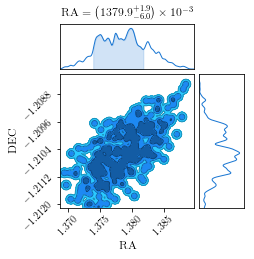

nsamples: 378
noise_logz: -27161.666
logz: -2016.105 +/-  0.187
log_bayes_factor: 25145.561 +/-  0.187

CPU times: user 1min 21s, sys: 1.29 s, total: 1min 22s
Wall time: 1min 22s


In [6]:
%%time 
result, sampler = peyote.sampler.run_sampler(
    likelihood, priors=priors, sampler='pymultinest', label='pymultinest',
    verbose=False, resume=False)
fig = sampler.plot_corner(save=False)
plt.show()
print(result)

# ptemcee

09:57 INFO    : Search parameters:
09:57 INFO    : Search parameters:
09:57 INFO    :   ra ~ Uniform(upper=6.28318530718, lower=0, support=6.28318530718, name=ra, _Prior__latex_label=$\mathrm{RA}$)
09:57 INFO    :   ra ~ Uniform(upper=6.28318530718, lower=0, support=6.28318530718, name=ra, _Prior__latex_label=$\mathrm{RA}$)
09:57 INFO    :   dec ~ Uniform(upper=1.57079632679, lower=-1.57079632679, support=3.14159265359, name=dec, _Prior__latex_label=$\mathrm{DEC}$)
09:57 INFO    :   dec ~ Uniform(upper=1.57079632679, lower=-1.57079632679, support=3.14159265359, name=dec, _Prior__latex_label=$\mathrm{DEC}$)
09:57 INFO    :   psi = 2.659
09:57 INFO    :   psi = 2.659
09:57 INFO    :   geocent_time = 1126259642.41
09:57 INFO    :   geocent_time = 1126259642.41
09:57 INFO    :   reference_frequency = 50.0
09:57 INFO    :   reference_frequency = 50.0
09:57 INFO    :   mass_2 = 29.0
09:57 INFO    :   mass_2 = 29.0
09:57 INFO    :   phase = 1.3
09:57 INFO    :   phase = 1.3
09:57 INFO    :   

A Jupyter Widget

10:00 INFO    : Renaming existing file outdir/ptemcee_result.h5 to outdir/ptemcee_result.h5.old
10:00 INFO    : Renaming existing file outdir/ptemcee_result.h5 to outdir/ptemcee_result.h5.old
10:00 INFO    : Saving result to outdir/ptemcee_result.h5
10:00 INFO    : Saving result to outdir/ptemcee_result.h5
10:00 WARNING : Parameter $\mathrm{DEC}$ in chain Chain 0 is not constrained
10:00 WARNING : Parameter $\mathrm{DEC}$ in chain Chain 0 is not constrained


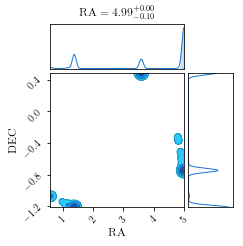

nsamples: 5000
noise_logz: -27161.666
logz:    nan +/-    nan
log_bayes_factor:    nan +/-    nan

CPU times: user 3min 3s, sys: 672 ms, total: 3min 3s
Wall time: 3min 3s


In [8]:
%%time 
result, sampler = peyote.sampler.run_sampler(
    likelihood, priors=priors, sampler='ptemcee', label='ptemcee',
    verbose=True, nwalkers=50, nsteps=200, nburn=100, ntemps=2, tqdm='tqdm_notebook')
fig = sampler.plot_corner(save=False)
plt.show()
print(result)